# **Manufacturing Firm with Excess Capacity:**

Problem Source: F. S. Hillier and G. J. Lieberman, "Introduction to Mathematical Programming," 2nd Edition, McGraw-Hill Inc., New York, 1995.

**Problem Statement:**

A manufacturing firm has discontinued the production of a certain unprofitable product line. This act created considerable excess production capacity. Management is considering devoting this excess capacity to one or more of three products; call them products $1$, $2$, and $3$. The available capacity on the machines that might limit output is summarized in the following table:

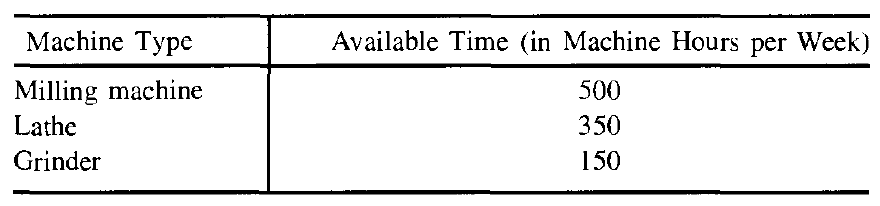

The number of machine hours required for each unit of the respective products is as follows:

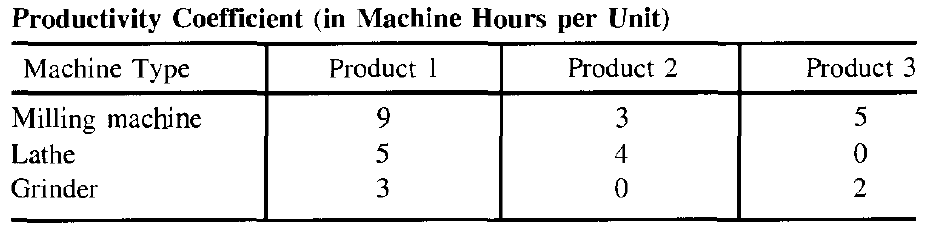

The sales department indicates that the sales potential for products $1$ and $2$ exceeds the maximum production rate and that the sales potential for product $3$ is $20$ units per week. The unit profit would be $50$, $20$, and $25$, respectively, on products $1$, $2$, and $3$. The objective is to determine how much of each product the firm should produce to maximize profit.

Formulate a linear programming model for this problem.

**Modeling:**

$x_{i} \qquad  i\in {1,2,3} \quad $   Number of units of Product $i$ produced per week

$\\ $

$Objective\ Function:\\ $

$Max\ Z = 50x_1 + 20x_2 + 25x_3$

$\\ $

$Constraints:\\ $

Milling Machine Capacity:

$9x_1 + 3x_2 + 5x_3 \leq 500$

Lathe Capacity:

$5x_1 + 4x_2 \leq 350$

Grinder Capacity:

$3x_1 + 2x_3 \leq 150$

Sales Constraint for Product 3:

$x_3 \leq 20$

Non-negativity Constraints:

$x_1 \geq 0, \quad x_2 \geq 0, \quad x_3 \geq 0$

## Using Pulp Library

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

In [2]:
# Defining Variables

products = [1, 2, 3]
x = LpVariable.dicts("x", products, lowBound=0, cat="Continuous")

In [3]:
# Defining Objective Function

model = LpProblem('Optimal_Production_Planning', LpMaximize)

model += 50 * x[1] + 20 * x[2] + 25 * x[3], "Total_Profit"

In [4]:
# Constraints

model += 9 * x[1] + 3 * x[2] + 5 * x[3] <= 500, "Milling_Machine_Capacity"
model += 5 * x[1] + 4 * x[2] <= 350, "Lathe_Capacity"
model += 3 * x[1] + 2 * x[3] <= 150, "Grinder_Capacity"
model += x[3] <= 20, "Sales_Limit_Product_3"

In [5]:
#Model summary

model

Optimal_Production_Planning:
MAXIMIZE
50*x_1 + 20*x_2 + 25*x_3 + 0
SUBJECT TO
Milling_Machine_Capacity: 9 x_1 + 3 x_2 + 5 x_3 <= 500

Lathe_Capacity: 5 x_1 + 4 x_2 <= 350

Grinder_Capacity: 3 x_1 + 2 x_3 <= 150

Sales_Limit_Product_3: x_3 <= 20

VARIABLES
x_1 Continuous
x_2 Continuous
x_3 Continuous

In [6]:
# Solving model

model.solve()
print('Optimal Solution:', pulp.value(model.objective))

Optimal Solution: 2904.7619


In [7]:
for variables in model.variables():
  print(f'{variables.name}:{variables.varValue}')

x_1:26.190476
x_2:54.761905
x_3:20.0


In [8]:
VNames = []
for variables in model.variables():
  VNames.append(variables.name)

VValue = []
for variables in model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,x_1,26.19
2,x_2,54.76
3,x_3,20.00


In [9]:
print('Current Status: ', LpStatus[model.status])

Current Status:  Optimal


## Using Pyomo Library

In [10]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

from pyomo.environ import *

In [12]:
# Create a ConcreteModel
model = ConcreteModel()

# Define a set of product indices
model.ProductTypes = Set(initialize=[1, 2, 3])

# Define the decision variables for each product type, constrained to be non-negative reals
model.x = Var(model.ProductTypes, domain=NonNegativeReals)

# Profit coefficients for each product type
profit_coefficients = {1: 50, 2: 20, 3: 25}


# Objective function: Maximize profit
model.profit = Objective(expr=sum(profit_coefficients[i] * model.x[i] for i in model.ProductTypes), sense=maximize)


# Constraints

# Machine capacity requirements for each product type
milling_requirements = {1: 9, 2: 3, 3: 5}
lathe_requirements = {1: 5, 2: 4, 3: 0}
grinder_requirements = {1: 3, 2: 0, 3: 2}

# Milling machine constraint: 9*x1 + 3*x2 + 5*x3 <= 500
model.milling_machine = Constraint(expr=sum(milling_requirements[i] * model.x[i] for i in model.ProductTypes) <= 500)

# Lathe constraint: 5*x1 + 4*x2 <= 350
model.lathe = Constraint(expr=sum(lathe_requirements[i] * model.x[i] for i in model.ProductTypes) <= 350)

# Grinder constraint: 3*x1 + 2*x3 <= 150
model.grinder = Constraint(expr=sum(grinder_requirements[i] * model.x[i] for i in model.ProductTypes) <= 150)

# Sales constraint for Product 3: x3 <= 20
model.sales_product3 = Constraint(expr=model.x[3] <= 20)


# Solve the model using a solver (GLPK)
SolverFactory('glpk').solve(model)

# Print results
print("Optimal Production Plan:")
for i in model.ProductTypes:
    print(f"Units of Product {i}: {model.x[i].value}")
print(f"Maximum Profit: ${model.profit()}")

Optimal Production Plan:
Units of Product 1: 26.1904761904762
Units of Product 2: 54.7619047619048
Units of Product 3: 20.0
Maximum Profit: $2904.7619047619064
